<a href="https://colab.research.google.com/github/GerardoMunoz/ML_2025/blob/main/Hopfield_Covariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/1WPJdAW-sFo?t=264


---

# 1. **Linear Algebra Topics**

---

## 1.1 **Dot Product**

The dot product of two vectors $u$ and $v$ is defined as:

$$ u \cdot v = \sum_{i=1}^{n} u_i v_i $$

Alternatively, using matrix notation:

$$ u \cdot v = u^T v $$


**Example: Dot Product in 3D**

Given two vectors in 3D:

$$ u = (2, -1, 3), \quad v = (4, 0, -2) $$

The dot product is computed as:

$$ u \cdot v = (2)(4) + (-1)(0) + (3)(-2) $$

$$ = 8 + 0 - 6 = 2 $$

Thus, the dot product of $u$ and $v$ is **2**.

**Properties:**
- Commutative: $ u \cdot v = v \cdot u $
- Distributive: $ u \cdot (v + w) = u \cdot v + u \cdot w $
- Scalar multiplication: $ (cu) \cdot v = c (u \cdot v) $

---

## 1.2 **Magnitude of a Vector**

The **magnitude** (or **norm**) of a vector $u$ is given by:

$$ ||u|| = \sqrt{u \cdot u} = \sqrt{\sum_{i=1}^{n} u_i^2} $$

In 3D, for a vector $u$:

$$ u = (x, y, z) $$

The magnitude is:

$$ ||u|| = \sqrt{x^2 + y^2 + z^2} $$

**Example in 3D**

Given the vector:

$$ u = (3, -4, 12) $$

The magnitude is calculated as:

$$ ||u|| = \sqrt{3^2 + (-4)^2 + 12^2} $$

$$ = \sqrt{9 + 16 + 144} $$

$$ = \sqrt{169} = 13 $$

Thus, the magnitude of $u$ is **13**.

**Properties:**
- **Non-negative:** The magnitude of any vector is always $ \geq 0 $.
- **Zero Vector:** $ ||u|| = 0 $ if and only if $ u $ is the zero vector.
- **Homogeneity (Scaling):** For any scalar $ c $, $ ||c u|| = |c| ||u|| $.
- **Triangle Inequality:** $ ||u + v|| \leq ||u|| + ||v|| $.

---



## 1.3 **Projection in 1D**

To project a vector $u$ onto a  vector $v$:


$$ \text{proj}_v u = \frac{u \cdot v}{v \cdot v} v $$

This gives the closest point to $u$ on the line that spans $v$

---

## 1.4 **Pseudo Inverse**

For a matrix **A**, the Moore-Penrose pseudo-inverse \( A^+ \) is defined as:

$$ A^+ = (A^T A)^{-1} A^T $$

When **A** is not square or not invertible, this gives the best least-squares solution to \( Ax = b \).

**Properties:**
- \( A A^+ A = A \)
- \( A^+ A A^+ = A^+ \)
- Symmetry in transposition: \( (A^+)^T = (A^T)^+ \)




---

# 2. **Vector Distances and Similarities**
If the operation satisfies these properties it is called **distance**.

- Non-negative: \( d(u, v) \geq 0 \)
- Identity: \( d(u, v) = 0 \iff u = v \)
- Symmetry: \( d(u, v) = d(v, u) \)
- Triangle inequality: \( d(u, w) \leq d(u, v) + d(v, w) \)

But if the operation that allows comparing vectors does not satisfy all the properties is called **similarity**.

---

## 2.1 **Euclidean Distance**

The Euclidean distance between two vectors **u** and **v** is given by:

$$ d(u, v) = \sqrt{\sum_{i=1}^{n} (u_i - v_i)^2} $$

Alternatively, in vector notation:

$$ d(u, v) = || u - v || $$


---

## 2.2 **Manhattan Distance**

Also called **L1 norm**, the Manhattan distance is:

$$ d_1(u, v) = \sum_{i=1}^{n} |u_i - v_i| $$

This measures the total absolute difference across dimensions.

**Best for:**
- Grid-based distance calculations (e.g., city block distance)
- Sparse or high-dimensional data

---

## 2.3 **Cosine Similarity**

Measures the angle between vectors:

$$ \text{cosine}(u, v) = \frac{u \cdot v}{||u|| ||v||} $$

**Range:**
- $ -1 $ (opposite direction)
- $ 0 $ (orthogonal)
- $ 1 $ (same direction)

Useful in:
- Text analysis ()
- Recommender systems

---


## 2.4 **Minkowski Distance**

The generalized form of Euclidean and Manhattan distances:

$$ d_p(u, v) = \left( \sum_{i=1}^{n} |u_i - v_i|^p \right)^{\frac{1}{p}} $$

- $ p = 1 $ → Manhattan Distance
- $ p = 2 $ → Euclidean Distance
- $ p \to \infty $ → Chebyshev Distance (max difference along any coordinate)

---

## 2.5 **Hamming Distance**

Counts differing elements:

$$ d_H(u, v) = \sum_{i=1}^{n} \mathbf{1}(u_i \neq v_i) $$

Used for:
- Comparing binary strings (e.g., error detection)
- DNA sequencing

---

# 2.6 **Applications of Distances & Similarities**

- **Machine Learning**: Nearest Neighbor classification, clustering
- **Natural Language Processing**: Text similarity, document comparison
- **Image Processing**: Feature matching, object recognition
- **Graph Theory**: Network analysis, social connections

---



# 3. **Gram matrix: Covariance Matrix and Hopfield Network**

---

## 3.1 Introduction
Given this two vectors in $\mathbb{R}^3$

$$
v_1 = \begin{bmatrix} 0.5 \\ 0.5 \\ -1 \end{bmatrix}, \quad
v_2 = \begin{bmatrix} -1 \\ 0.5 \\ 0.5 \end{bmatrix}
$$

We can define a transformation from $\mathbb{R}^2$ to $\mathbb{R}^3$ using the matriz $A=[v_1\ \ v_2]$:

$$
\begin{bmatrix}
y_1\\y_2\\y_3
\end{bmatrix}
=\begin{bmatrix}
0.5 & -1 \\
0.5 & 0.5 \\
-1 & 0.5
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\end{bmatrix}
$$


It is also possible to define a transformation from $\mathbb{R}^3$ to $\mathbb{R}^2$ using $A^T$


$$
\begin{bmatrix}
x'_1\\x'_2
\end{bmatrix}
=\begin{bmatrix}
0.5 & 0.5 & -1 \\
-1 & 0.5 & 0.5
\end{bmatrix}
\begin{bmatrix}
y'_1\\y'_2\\y'_3\end{bmatrix}
$$




Here we will study the composition of both $A^TA$ and $AA^T$ which are called **Gram matrices**.



## 3.2 Gram matrix is a matrix of dot products.

$$
A = \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix}
$$

$$
A^T = \begin{bmatrix} v_1^T \\ v_2^T \\ \vdots \\ v_n^T \end{bmatrix}
$$

$$
A^TA = \begin{bmatrix} v_1^T \\ v_2^T \\ \vdots \\ v_n^T \end{bmatrix}\begin{bmatrix} v_1 & v_2 & \cdots & v_3 \end{bmatrix}
$$

$$
A^TA = \begin{bmatrix}
v_1 \cdot v_1 & v_1 \cdot v_2 & \cdots & v_1 \cdot v_n\\
v_2 \cdot v_1& v_2 \cdot v_2  & \cdots & v_2 \cdot v_n\\
\vdots & \vdots & \ddots & \vdots &\\
v_n \cdot v_1& v_n \cdot v_2  & \cdots & v_n \cdot v_n \end{bmatrix}
$$

- **Size**: If $A$ is $ m \times n $ matrix  (i.e. each vector $v_i$ has $m$ rows) then $A^TA$ is $ n \times n $ square matrix. And $AA^T$ is $ m \times m $ square matrix. It represents different things if $m>n$ or if $m<n$.
- **Diagonal values**: $ G_{ii} = v_i \cdot v_i $ → **squared norm** of each vector.  
- **Off-diagonal values**: $ G_{ij} = v_i \cdot v_j $ → **similarity** between vectors.  

$A^TA$ is used in the Moore-Penrose pseudo-inverse. But in the next two sections we are going to use $AA^T$, where the matrix is square $m \times m$ and $m$ is the number of components of each vector $v_i$.



# 3. **Hopfield Network**
**More dimensions than vectors**. So if A is $ m \times n$ then $m>n$.

$$
A = \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix}
$$


Each vector $v_i$ is a pattern that will be stored in the  Hopfield Network  **weight matrix** ($W$), computed as:

$$
W =  AA^T
$$

---

## 3.1 **Example step by step**

In our example, it is a  transformation from $\mathbb{R}^3$ to $\mathbb{R}^3$.
If
$$
A=\begin{bmatrix}
0.5 & -1 \\
0.5 & 0.5 \\
-1 & 0.5
\end{bmatrix}
$$
then
$$
\begin{bmatrix}
y_1\\y_2\\y_3
\end{bmatrix}
=\begin{bmatrix}
0.5 & -1 \\
0.5 & 0.5 \\
-1 & 0.5
\end{bmatrix}
\begin{bmatrix}
0.5 & 0.5 & -1 \\
-1 & 0.5 & 0.5
\end{bmatrix}
\begin{bmatrix}
y'_1\\y'_2\\y'_3\end{bmatrix}
$$



$$
\begin{bmatrix}
y_1\\y_2\\y_3
\end{bmatrix}
=
\begin{bmatrix}1.25 & -0.25 & -1.0\\-0.25 & 0.5 & -0.25\\-1.0 & -0.25 & 1.25\end{bmatrix}
\begin{bmatrix}
y'_1\\y'_2\\y'_3\end{bmatrix}
$$





The weights $W$ allow us to recover the patterns of positive (+1) and negative (-1) values, where each column of $A$ is one pattern.

The first column is

$$
v_1 = \begin{bmatrix} 0.5 \\ 0.5 \\ -1 \end{bmatrix},
$$

So it has a pattern of positives and negatives.

$$
\begin{bmatrix} 1 \\ 1 \\ -1 \end{bmatrix},
$$

If we add noise, for example to the second row, it sign changes.

$$
\begin{bmatrix} 1 \\ -1 \\ -1 \end{bmatrix},
$$

Now we use $W$ to restore the pattern.


$$
\begin{bmatrix}1.25 & -0.25 & -1.0\\-0.25 & 0.5 & -0.25\\-1.0 & -0.25 & 1.25\end{bmatrix}
\begin{bmatrix} 0 \\ 1 \\ -1 \end{bmatrix}
=\begin{bmatrix}0.75\\0.75\\-1.5\end{bmatrix}
$$


So the answer recovers the pattern.

$$
\begin{bmatrix} 1 \\ 1 \\ -1 \end{bmatrix},
$$

---

## 3.2 **Example in Python**

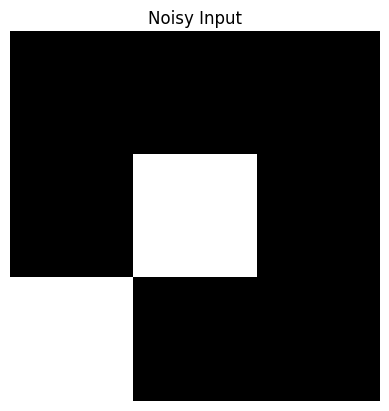

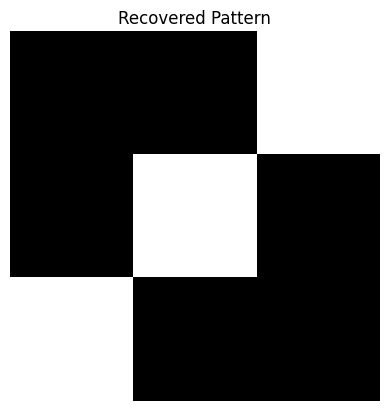

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sign(x):
    return np.where(x >= 0, 1, -1)

def train_hopfield(patterns):
    N = patterns.shape[1]
    W = np.zeros((N, N))
    for p in patterns:
        W += np.outer(p, p)
    np.fill_diagonal(W, 0)  # No self-connections
    return W / N  # Normalize weights

def recall_hopfield(W, input_pattern, steps=5):
    s = input_pattern.copy()
    for _ in range(steps):
        s = sign(W @ s)  # Update all neurons at once
    return s

def display_pattern(pattern, title="Pattern"):
    size = int(np.sqrt(len(pattern)))
    plt.imshow(pattern.reshape(size, size), cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Define 3x3 patterns for '/' and '\'
pattern_slash = np.array([
    -1, -1,  1,
    -1,  1, -1,
     1, -1, -1
])

pattern_backslash = np.array([
     1, -1, -1,
    -1,  1, -1,
    -1, -1,  1
])

# Store patterns in Hopfield Network
patterns = np.array([pattern_slash, pattern_backslash])
W = train_hopfield(patterns)

# Create a noisy input
noisy_input = np.array([
    -1, -1, -1,
    -1,  1, -1,
     1, -1, -1
])

display_pattern(noisy_input, "Noisy Input")

# Recall stored pattern
recovered_pattern = recall_hopfield(W, noisy_input)
display_pattern(recovered_pattern, "Recovered Pattern")






# 4. **Covariance Matrix**
**More vectors than dimensions**.  So if A is $ m \times n$ then $m<n$.

$$
A = \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix}
$$


In statistics, the **covariance matrix** is:

$$
C = AA^T
$$

---

## 4.1 Example

In our example it is a transformation from $\mathbb{R}^2$ to $\mathbb{R}^2$.
If
$$
A=\begin{bmatrix}
0.5 & 0.5 & -1 \\
-1 & 0.5 & 0.5
\end{bmatrix}
$$
Then
$$
\begin{bmatrix}
x'_1\\x'_2
\end{bmatrix}
=\begin{bmatrix}
0.5 & 0.5 & -1 \\
-1 & 0.5 & 0.5
\end{bmatrix}
\begin{bmatrix}
0.5 & -1 \\
0.5 & 0.5 \\
-1 & 0.5
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\end{bmatrix}
$$

$$
\begin{bmatrix}
x'_1\\x'_2
\end{bmatrix}
=\begin{bmatrix}1.5 & -0.75\\-0.75 & 1.5\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\end{bmatrix}
$$








## 4.2 **Viewing the transpose of $A$**

Suppose that all the vectors of the matrix are in $\mathbb{R}^2$, and that the sum of all vectors is the vector zero. So we can write

$$
A = \begin{bmatrix} v_{1x} & v_{2x} & \cdots & v_{nx} \\ v_{1y} & v_{2y} & \cdots & v_{ny} \end{bmatrix}
$$

The transpose is

$$
B=A^T=\begin{bmatrix} v_{1x} & v_{1y} \\ v_{2x} & v_{2y} \\ \vdots & \vdots \\ v_{nx} & v_{ny} \end{bmatrix} = \begin{bmatrix} u_{1} & u_{2}  \end{bmatrix}
$$

So now we have only two vectors, the first one has all the $x$ components, and the second one has all the $y$ components. Now we are going to calculate the covariance matrix and interpret it. Remember that $B=A^T$ and so $A=B^T$.

$$
C=AA^T=B^TB =  \begin{bmatrix} u_{1}^T \\ u_{2}^T  \end{bmatrix} \begin{bmatrix} u_{1} & u_{2}  \end{bmatrix} = \begin{bmatrix} u_{1} \cdot u_1 & u_1 \cdot u_{2} \\ u_{2} \cdot u_1 & u_2 \cdot u_{2} \end{bmatrix}
$$

The first element is
$$u_{1} \cdot u_1=||u_1||^2$$
that is the square of the norm of the vector with all $x$ components. So if the x components are high then the norm is high, so this component represents how the points are distributed along the $x$ axis.  The same will happen with all elements of the diagonal, in particular, the last element
$$  u_2 \cdot u_{2}=||u_2||^2$$
represents the distribution of the points along the $y$ axis. This is called the variance of the axis.


The second element and the third element are the same because the dot product is commutative. So this matriz is simetric.
$$ u_1 \cdot u_{2} = u_{2} \cdot u_1$$
This dot product is high if both components are large, and this happens if the points are along the line $x=y$. So this component represents how the points are related in both components. In general, the non-diagonal elements represent the relation of both components. This is called the covariance between the two axes.


The Covariance Matrix $C$ (or the weight matrix) when multiplying a vector ($Cw$), transforms the components to better match the patterns.

---

# 5. **Eigenvectors** (images review)
![img01](https://raw.githubusercontent.com/GerardoMunoz/PresentacionesAlgebraLineal/main/imagenes/VectProp_01_Geom.png)

![img02](https://raw.githubusercontent.com/GerardoMunoz/PresentacionesAlgebraLineal/main/imagenes/VectProp_02_Deduc.png)

![img01](https://raw.githubusercontent.com/GerardoMunoz/PresentacionesAlgebraLineal/main/imagenes/VectProp_03_EjemA.png)

![img01](https://raw.githubusercontent.com/GerardoMunoz/PresentacionesAlgebraLineal/main/imagenes/VectProp_04_EjemB.png)


# 6. **PCA Using the Covariance Matrix**

---

## 6.1 **Steps by step algorithm**

Let $ A $ be an $ m \times n $ matrix (with $m$ rows and $n$ columns).

### 6.1.1 **Center the Data**
Subtract the mean from each feature:

$$
A_{\text{centered}} = A - \text{mean}(A)
$$

### 6.1.2 **Compute the Covariance Matrix**
$$
C = \frac{1}{n} A_{\text{centered}}^T A_{\text{centered}}
$$

- $ C $ is an $ m \times m $ matrix.
- The **diagonal elements** represent **variances** of individual features.
- The **off-diagonal elements** represent **covariances** between features.

### 6.1.3 **Compute the Eigenvectors and Eigenvalues of $ C $**
$$
C v_i = \lambda_i v_i
$$

- The **eigenvectors** $ v_i $ are the **principal components**.
- The **eigenvalues** $ \lambda_i $ measure the **amount of variance** explained by each principal component.

### 6.1.4 **Select the Top $ k $ Principal Components**
- Choose the eigenvectors corresponding to the **largest eigenvalues**.
- This reduces the data to a **lower-dimensional space**.

### 6.1.5 **Project the Data Onto the New Basis**
$$
Z = A_{\text{centered}} V_k
$$

where $ V_k $ contains the **top $ k $ eigenvectors**.

---

## 6.2 **Example**

## ¿Cuál es la mejor forma para proyectar puntos?

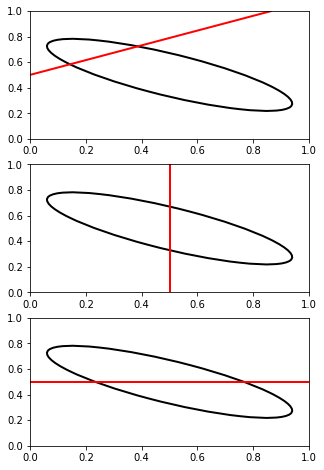

In [ ]:
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt

xcenter, ycenter = 0.5, 0.5
width, height = 1, 3e-1
angle = -30

fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(311, aspect='auto')
e2 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)
ax.add_patch(e2)
r2 = patches.Rectangle((0, 0.5), 1, 0,
                     angle=-angle, linewidth=2, fill=False, zorder=2, color='r')
ax.add_patch(r2)

ax = fig.add_subplot(312, aspect='auto')
e3 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)
ax.add_patch(e3)
r3 = patches.Rectangle((0.5, 0.0), 1, 0,
                     angle=90, linewidth=2, fill=False, zorder=2, color='r')
ax.add_patch(r3)
ax = fig.add_subplot(313, aspect='auto')
e1 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)
ax.add_patch(e1)
r1 = patches.Rectangle((0, 0.5), 1, 0,
                     angle=0, linewidth=2, fill=False, zorder=2, color='r')
ax.add_patch(r1)


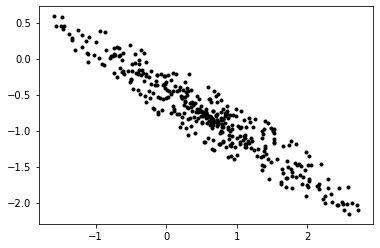

In [ ]:
n_vectors=400
d=2
rng = np.random.RandomState(1)
rnd_vec=rng.uniform(-1, 1, size=(n_vectors, d))                # the initial random vectors
unif=rng.uniform(size=n_vectors)                               # a second array random numbers
scale_f=np.expand_dims(np.linalg.norm(rnd_vec, axis=1)/unif, axis=1) # the scaling factors
circulo=(rnd_vec/scale_f).T
#rnd_vec.shape
A=np.array([[1,-2],[-1,1]])
rnd_vec= A @ circulo  +  np.array([[0.6],[-0.8]])
plt.plot(rnd_vec[0,:], rnd_vec[1,:], '.', color='black')

In [ ]:
m,n = rnd_vec.shape
m,n

(2, 400)

`rnd_vec` es un arreglo con dos renglones (m=2) y 400 columnas (n=400). En la figura se ven los 400 puntos.

## El primer paso es __encontrar el centro__ de los puntos.
El centro en el eje $x$ es el promedio de todas las componentes $x$, de manera similar se obtiene el promedio en el eje $y$.

In [ ]:
centro = (1/n)*np.sum(rnd_vec,axis=1)
centro

array([ 0.59514884, -0.80301048])

## El segundo paso es __ubicar el origen de coordenadas en el centro de los puntos__.

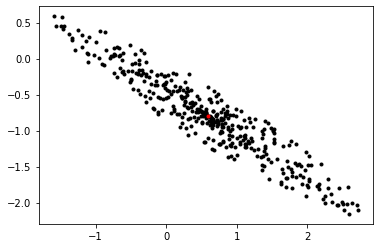

In [ ]:
plt.plot(rnd_vec[0,:], rnd_vec[1,:], '.', color='black')
plt.plot(centro[0], centro[1], '.', color='red')

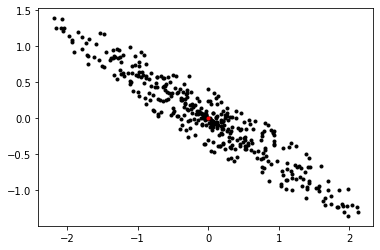

In [ ]:
puntos_centrados = rnd_vec - centro.reshape(2,1)
plt.plot(puntos_centrados[0,:], puntos_centrados[1,:], '.', color='black')
plt.plot(0, 0, '.', color='red')

## El tercer paso es __estimar que tan dispersos están los puntos__ con la matriz de covarianza.
Este paso requiere tres sub-pasos: Dispersión horizontal ($var(x)$), dispersión vertical ($var(y)$) y la dispersión diagonal ($cov(x,y)$).

Pero antes veamos un par de vectores.

### Vector de las coordenadas horizontales ($\tilde{x}$) y vector de las coordenadas verticales ($\tilde{y}$)

Sabemos que `puntos_centrados` es un arreglo de dos renglones y 400 columnas. El cual llamaremos la matriz $C$.

$C=\begin{bmatrix} x_1 & x_2 & \cdots & x_{400} \\ y_1 & y_2 & \cdots & y_{400} \end{bmatrix} $



In [ ]:
puntos_centrados.shape

(2, 400)

Podemos describir esta matriz por sus columnas, llamando cada punto como un vector.

$C=\begin{bmatrix} \vec{v}_1 & \vec{v}_2 & \cdots & \vec{v}_{400}  \end{bmatrix} $

En este caso nos interesa describir la matriz por sus renglones, porque necesitamos operar todas las coordenadas $x$ por un lado, y por otro, las coordenadas $y$.

$C=\begin{bmatrix} \tilde{x}^T \\ \tilde{y}^T  \end{bmatrix} $

En donde $\tilde{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_{400} \end{bmatrix} $  y $\tilde{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_{400} \end{bmatrix} $

In [ ]:
x_tilde = puntos_centrados[0,:]
y_tilde = puntos_centrados[1,:]

### Dispersión horizontal ($var(x)$):

 Si sumamos las coordenadas $x_i$ de todos los puntos debería dar cero, porque el origen de coordenadas coincide ahora con el centro de los puntos. Pero si sumamos $x_i^2$ ya no da cero porque ahora todos los sumandos son positivos o  cero. El promedio de los $x^2$ se llama $var(x)$, y es fácil comprobar que $$var(x)=\frac{\tilde{x} \cdot \tilde{x}}{n}$$

In [ ]:
x_tilde.dot(x_tilde)/n

0.8262194307818649


### Dispersión vertical ($var(y)$):

De manera similar se define $$var(y)=\frac{\tilde{y} \cdot \tilde{y}}{n}$$

In [ ]:
y_tilde.dot(y_tilde)/n

0.3179200742411154

### Dispersión diagonal ($cov(x,y)$)

Cuando un punto esta cerca del eje horizontal el valor de $y_i$ es más cercano a cero. Pero si el punto esta cerca del eje vertical el valor de $x_i$ es más cercano a cero. El producto $x_i y_i$ es máximo cuando el punto está cerca a una recta diagonal a 45°. Además, es negativo cerca a la recta diagonal a -45°.

El promedio de la suma de estos productos es se llama $cov(x,y)$ y se define $$cov(x,y)=\frac{\tilde{x} \cdot \tilde{y}}{n}$$

In [ ]:
x_tilde.dot(y_tilde)/n

-0.48597607427197376

### Matriz de covarianza

Recordemos que si $C=\begin{bmatrix} \tilde{x}^T \\ \tilde{y}^T  \end{bmatrix} $ entonces $C^T=\begin{bmatrix} \tilde{x} & \tilde{y}  \end{bmatrix} $

y por lo tanto $\frac{1}{n}CC^T=\begin{bmatrix} \tilde{x}^T \\ \tilde{y}^T  \end{bmatrix} \begin{bmatrix} \tilde{x} & \tilde{y}  \end{bmatrix}=\frac{1}{n}\begin{bmatrix} \tilde{x}^T \tilde{x}&\tilde{x}^T \tilde{y}\\ \tilde{y}^T\tilde{x} & \tilde{y}^T  \tilde{y}\end{bmatrix} = \frac{1}{n}\begin{bmatrix} \tilde{x} \cdot \tilde{x}&\tilde{x} \cdot \tilde{y}\\ \tilde{y} \cdot \tilde{x} & \tilde{y} \cdot \tilde{y}\end{bmatrix} = \begin{bmatrix} var(x)&cov(x,y)\\ cov(y,x) & var(y)\end{bmatrix}$

La cual se conoce como la matriz de covarianza.

In [ ]:
matriz_covarianza = (1/n)*puntos_centrados @ puntos_centrados.T
matriz_covarianza

array([[ 0.82621943, -0.48597607],
       [-0.48597607,  0.31792007]])

La matriz de covarianzas se puede interpretar como una transformación que transforma los puntos dentro de un círculo

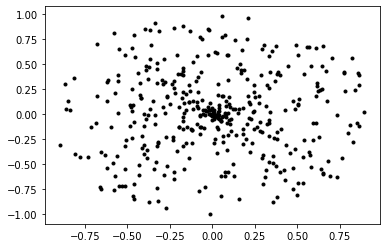

In [ ]:
plt.plot(circulo[0,:], circulo[1,:], '.', color='black')

en los puntos dentro de una elipse

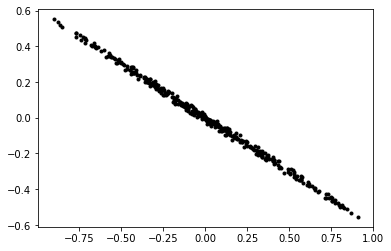

In [ ]:
modelo= matriz_covarianza @ circulo
plt.plot(modelo[0,:], modelo[1,:], '.', color='black')

El anterior modelo no es igual a los datos originales (que se muestran abajo). Sin embargo, tienen el mismo ángulo de inclinación, lo cual será muy útil para encontrar la proyección.

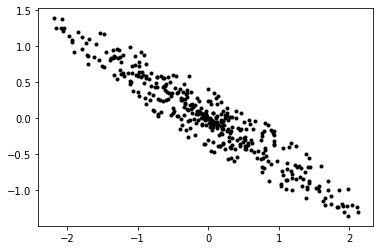

In [ ]:
plt.plot(puntos_centrados[0,:], puntos_centrados[1,:], '.', color='black')

## Cuarto paso, __calcular los valores propios de la matriz de covarianza__

Lo interesante es que los valores propios indican los vectores que no cambian de dirección, lo cual corresponde a los ejes de la elipse. Cada valor propio indica lo extensa de la elipse en ese eje.

In [ ]:
matriz_covarianza.tolist()

[[0.8262194307818649, -0.4859760742719738],
 [-0.4859760742719738, 0.3179200742411153]]

In [ ]:
import sympy as sp
l = sp.symbols('\lambda')
matriz_caracteristica = sp.Matrix(matriz_covarianza.tolist()) - l*sp.eye(2)
matriz_caracteristica

Matrix([
[0.826219430781865 - \lambda,          -0.485976074271974],
[         -0.485976074271974, 0.317920074241115 - \lambda]])

In [ ]:
sp.det(matriz_caracteristica)

\lambda**2 - 1.14413950502298*\lambda + 0.0264989980088235

Utilizando la cuadrática obtenemos los valores propios.

In [ ]:
a=1
b=-1.14413950502298
c=0.0264989980088234

l1=(-b + sp.sqrt(b**2 - 4*a*c))/(2*a)
l2=(-b - sp.sqrt(b**2 - 4*a*c))/(2*a)
l1,l2

(1.12049003270701, 0.0236494723159688)

Al seleccionar los vectores propios con mayor valor propio, se selecciona los vectores que generan el subespacio sobre el cual se van a realizar las proyecciones.

En este caso el mayor valor propio es  $\lambda_1 = 1.12049003270701$,

A continuación, se procede a encontrar la solución del sistema homogéneo de la primera matriz característica.

In [ ]:
M=np.hstack((matriz_covarianza - 1.12049003270701*sp.eye(2), np.zeros((2,1))))
M

array([[-0.294270601925145, -0.485976074271974, 0.0],
       [-0.485976074271974, -0.802569958465895, 0.0]], dtype=object)

In [ ]:
M[1,:] = M[1,:] - M[0,:]*M[1,0]/M[0,0]
M

array([[-0.294270601925145, -0.485976074271974, 0.0],
       [0, 4.99600361081320e-15, 0]], dtype=object)

Debido a las aproxiomaciones de 15 dígitos de los números tipos `float`, 4.99600361081320e-15 puede ser considerado como cero.

Ahora se procede a encontrar la solución general. Cómo $x_2$ es una variable libre se le asigna un parámetro.

$$x_2 = t$$

Ahora se despeja la variable delantera $x_1$.

$-0.294270601925145 x_1 -0.485976074271974t =0$

In [ ]:
0.485976074271974/-0.294270601925145

-1.6514598165520933



$x_1 \approx -1.6514598165520933t$

La solución general es

$$\begin{pmatrix}x_1 \\ x_2 \end{pmatrix} = t\begin{pmatrix}-1.6514598165520933 \\ 1 \end{pmatrix}$$

Ahora se verifica que $\begin{pmatrix}-1.6514598165520933 \\ 1 \end{pmatrix}$ sí es un vector propio. Bueno, hasta donde las aproximaciones lo permitan.

In [ ]:
matriz_covarianza @ np.array([[-1.6514598165520933],[1]])

array([[-1.85044426],
       [ 1.12049003]])

In [ ]:
1.12049003270701 * np.array([[-1.6514598165520933],[1]])

array([[-1.85044426],
       [ 1.12049003]])

Ahora se grafica el vector propio sobre los puntos.

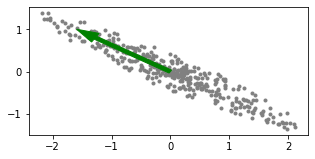

In [ ]:
fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(311, aspect='auto')
e2 = patches.Arrow(0,0,-1.593847973468874,1,width=0.4,color='green',zorder=3)
ax.add_patch(e2)

plt.plot(puntos_centrados[0,:], puntos_centrados[1,:], '.', color='gray')

Finalmente se grafica el subespacio sobre los puntos.

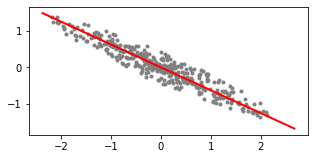

In [ ]:
fig = plt.figure(figsize=(5,8))

ax = fig.add_subplot(311, aspect='auto')
r1 = patches.Rectangle((1.5*-1.593847973468874,1.5*1), 6, 0,
                     angle=np.arctan(1/-1.593847973468874)*180/np.pi, linewidth=2, fill=False, zorder=4, color='r')
ax.add_patch(r1)
plt.plot(puntos_centrados[0,:], puntos_centrados[1,:], '.', color='gray')

El anterior procedimiento se conoce como el análisis de componentes principales (PCA). Observe que sólo obtuvimos el vector propio del mayor valor propio. Los mayores valores propios indican cuales componentes son principales.

En este caso teníamos puntos en $\mathbb{R}^2$, pero este procedimiento se puede extender a    $\mathbb{R}^k$

# 7. **Step-by-Step Singular Value Decomposition (SVD)**  

Singular Value Decomposition (SVD) factorizes a matrix $A$ into three matrices:  

$$
A = U \Sigma V^T
$$  

where:  
- $U$ is an **orthogonal** (or unitary) matrix containing the **left singular vectors**.  
- $\Sigma$ is a **diagonal matrix** containing the **singular values**.  
- $V^T$ is an **orthogonal** (or unitary) matrix containing the **right singular vectors**.  

---

## 7.1 **Step by step algorithm**

### 7.1.1 **Compute $A^T A$ and $A A^T$**  

To find $V$ and $U$, we compute:  

$$
A^T A
$$  

and  

$$
A A^T
$$  

These matrices are **symmetric**, and their eigenvectors give us $V$ and $U$, respectively.  



### 7.1.2 **Compute Eigenvalues & Eigenvectors**  

Solve the **eigenvalue problems**:  

$$
A^T A v_i = \lambda_i v_i
$$  

$$
A A^T u_i = \lambda_i u_i
$$  

where:  
- The **eigenvectors** $v_i$ of $A^T A$ form the columns of $V$.  
- The **eigenvectors** $u_i$ of $A A^T$ form the columns of $U$.  
- The **eigenvalues** $\lambda_i$ are used to compute the **singular values**:  

$$
\sigma_i = \sqrt{\lambda_i}
$$  

Both $A^T A$ and $A A^T$ share the same nonzero eigenvalues $\lambda_i$.



### 7.1.3 **Construct the Matrices $U$, $\Sigma$, and $V^T$**  

- The **columns of $U$** are the **eigenvectors of $A A^T$**.  
- The **columns of $V$** are the **eigenvectors of $A^T A$**.  
- The **singular values** $\sigma_i$ are placed in the **diagonal matrix $\Sigma$**.  



### 7.1.4 **Verify the Decomposition**  

Check that:  

$$
A = U \Sigma V^T
$$  

This confirms that $U$ and $V$ are **orthogonal matrices**, and $\Sigma$ contains **non-negative singular values** sorted in descending order.  



### 7.1.5 **Applications of SVD**  

- **Dimensionality Reduction (PCA)**: The top $k$ singular values capture most of the variance.  
- **Pseudo-Inverse Computation**: $A^+ = V \Sigma^+ U^T$.  
- **Low-Rank Approximation**: Approximating $A$ using only the top $k$ singular values.  

---

# 8 **How Is SVD Used in PCA?**  

Principal Component Analysis (PCA) is used for **dimensionality reduction**, and it is directly related to SVD.  

---

## 8.1 **Step-by-Step PCA Using SVD**  

### 8.1.1 **Center the Data**  
Subtract the mean from each feature:  

$$
X_{\text{centered}} = X - \text{mean}(X)
$$  

### 8.1.2 **Compute SVD**  

$$
X = U \Sigma V^T
$$  

### 8.1.3 **Select the Top $k$ Singular Values and Vectors**  
- The first **$k$ columns of $U$** give the **principal components**.  
- The **first $k$ singular values in $\Sigma$** show how much variance each component explains.  

### 8.1.4 **Project Data onto the New Subspace**  

$$
Z = X V_k
$$  

where $V_k$ contains the **top $k$ right singular vectors**.  


---

## 8.2 **Why Use SVD Instead of Covariance?**
* **Numerical Stability**:  SVD is more stable than computing eigenvalues of Covariance matrix.
* **Works for Any Matrix**:  PCA via covariance $A$ is full-rank. SVD does not have this issue.
